In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

# sns.set(font_scale=1.7)
root = '/Users/bolin/Library/CloudStorage/OneDrive-UniversityofToronto/AutoLTS/res/'

# Loss Visualization

In [95]:
def check_loss(file_name):
    # load loss records
    path = root + f'{file_name}_loss.txt'
    loss = np.loadtxt(path, delimiter=',')
    train_loss = loss[:, 0] / 27407
    vali_loss = loss[:, 1] / 5873
    # serch for the lowest validation point
    idx = np.argmin(vali_loss)
    # visualize
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(train_loss, label='Training', color='blue')
    ax.plot(vali_loss, label='Validation', color='red')
    ax.hlines(vali_loss[idx], 0, len(train_loss), color='black', linestyle='dashed')
    ax.set_title(f'Experiment ID {file_name}', size=15)
    ax.set_xlabel('Epoch', size=20)
    ax.set_ylabel('Mean Cross Entropy Loss', size=20)
    plt.legend(fontsize=18)
    
    
    plt.show()

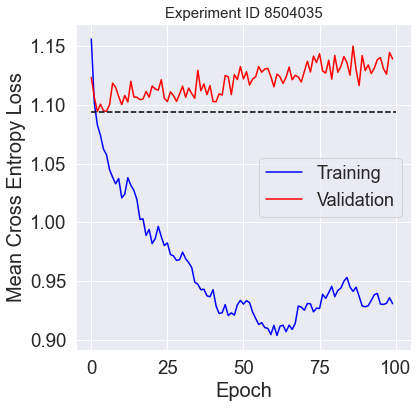

In [96]:
check_loss('8504035')

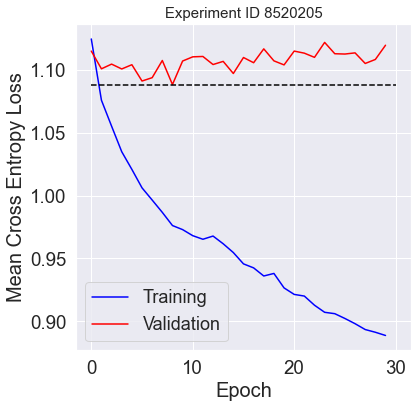

In [97]:
check_loss('8520205')

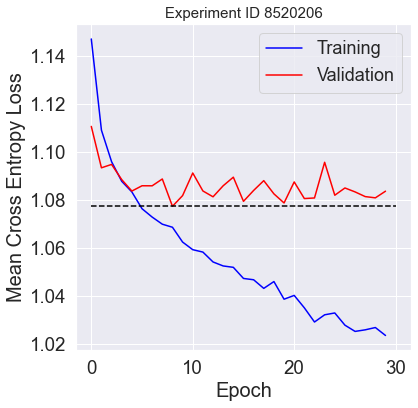

In [98]:
check_loss('8520206')

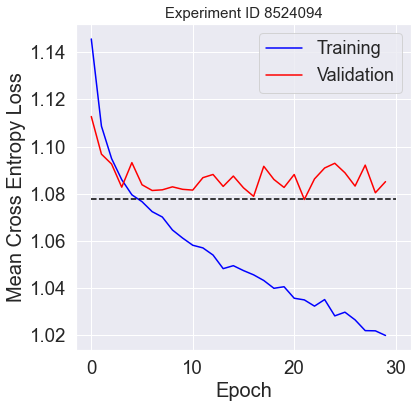

In [101]:
check_loss('8524094')

# Confusion Matrix Visualization

In [106]:
def check_conf_mat(file_name):
    # load data
    res = torch.load(root + f'{file_name}_res.pt')
    # visualization
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax_cbar = fig.add_axes([0.93, 0.13, 0.02, 0.75])
    for idx, dataset in enumerate(['training', 'validation', 'test']):
        data = res[dataset]['conf_mat'] * 100
        acc = res[dataset]['accuracy']
        sns.heatmap(data, ax=ax[idx], annot=True, cmap=sns.light_palette("seagreen", reverse=False), 
                    vmin=0, vmax=100, annot_kws={'fontsize':22}, cbar_ax=ax_cbar)
        ax[idx].set_title(f'{dataset} (accuracy {acc:.2f}%)', size=20)
        ax[idx].set_xticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_yticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_xlabel('Predicted Label', size=20)
        if idx == 0:
            ax[idx].set_ylabel('True Label', size=25)
    plt.show()

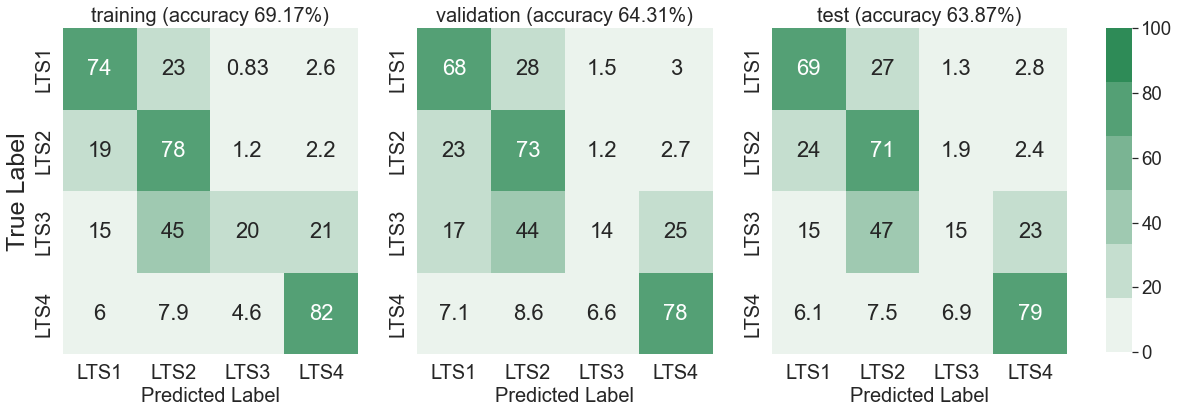

In [107]:
check_conf_mat('8504035_4')

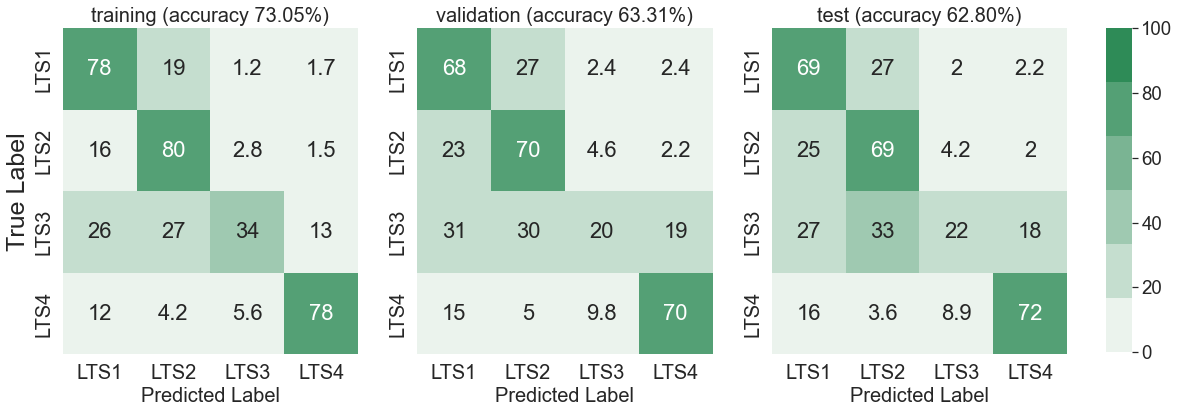

In [99]:
check_conf_mat('8520205_4')

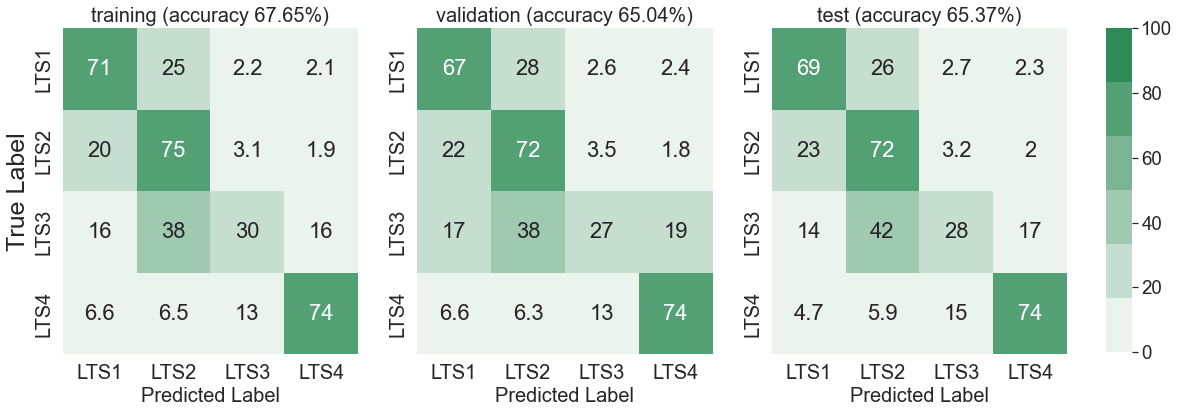

In [100]:
check_conf_mat('8520206_4'66)

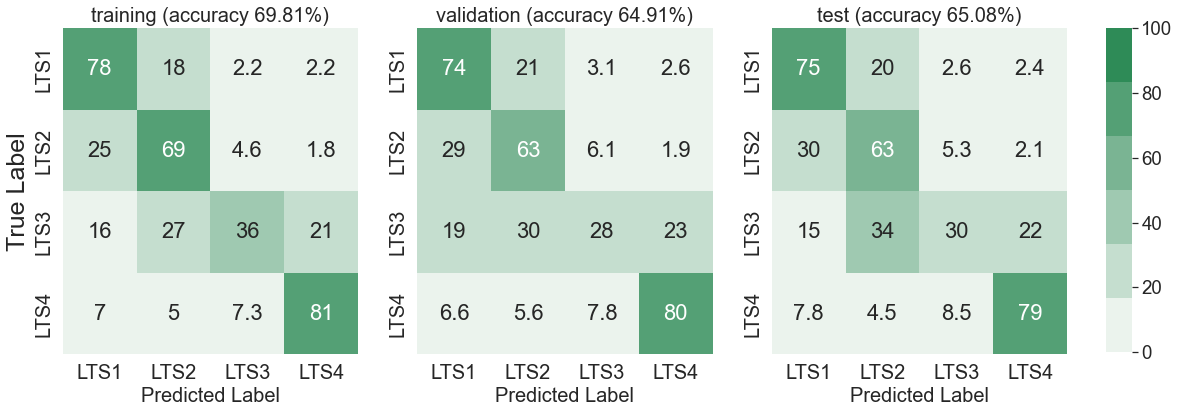

In [103]:
check_conf_mat('8524094_14')